# Learning Rate Evaluation

In this project we will evaluate the importance of a good learning rate value when training our model.

The next formula is the equation by which the Neural Network upgrades its parameters' values (the weights and the bias, represented by a Theta).

$$\Large {\theta^{(i+1)} = \theta^{(i)} - \alpha \nabla \mathcal{L}(Y,f_{\theta^{(i)}}(X))}$$

The learning rate, represented by an Alpha, is the slope. Conceptually, it can be described as the size of the "steps" in which we move towards a local minimum in the loss function.

By this method, called Stochastic Gradient Descent, the value of the loss function will (hopefully) decrease everytime we upgrade the parameters. However, if we choose a bad learning rate, the loss function value could increase.

**Libraries**

Let's start by importing all the libraries we will need:

In [3]:
%matplotlib inline
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.datasets import mnist
from keras.utils import np_utils
import matplotlib.pyplot as plt
from keras import optimizers

Using TensorFlow backend.
/home/anothergroup3/env/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


**Functions**

We define the functions we will use repeatedly through this project.

First of all, we create our Convolutional Neural Network by passing as a parameter the learning rate value.

In [4]:
def eval_hyperparam(learning_rate): 
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    sgd = optimizers.SGD(lr=learning_rate) #using SGD as an optimizer
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=200, verbose=0)
    scores = model.evaluate(X_test, y_test, verbose=0)
    print("Baseline Error: %.2f%%" % (100-scores[1]*100))
    return history

The following functions will display in a graph the accuracy and the cross (categorical loss entropy) evolution throughout the training and the validation process.

In [5]:
def plot_accuracy(history):
    plt.plot(history.history['acc'], label='training accuracy')
    plt.plot(history.history['val_acc'], label='validation accuracy')
    plt.legend()
    plt.title("Accuracy")
    plt.show()

In [6]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='training loss')
    plt.plot(history.history['val_loss'], label='validation loss')
    plt.title('Loss (categorical cross entropy)')
    plt.legend()
    plt.show()

**Data reshaping**

We transform the data from MNIST dataset in order to make it readable for the CNN.

In [7]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255.
X_test = X_test / 255.

In [8]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

**Comparison of different learning rate values**

Let's proceed to train our model considering different learning rate values.

In each case, we will train two times the model in order to take into account how the random samples chosen for the training dataset and for the mini-batches used to calculate the Stochastic Gradient Descent influence its accuracy and error.

**Case 1**: learning rate = 0.01

Baseline Error: 1.77%


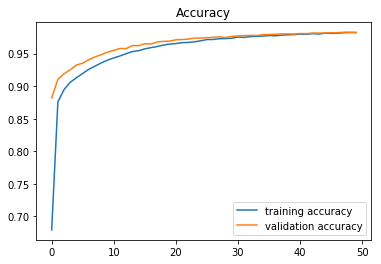

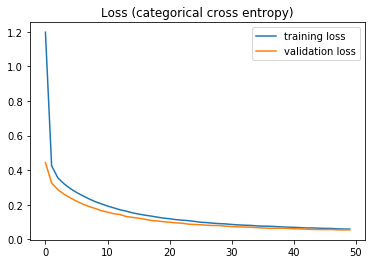

In [9]:
history = eval_hyperparam(0.01)
plot_accuracy(history)
plot_loss(history)

Baseline Error: 1.86%


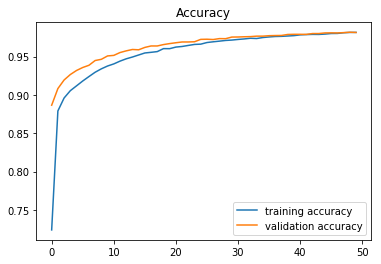

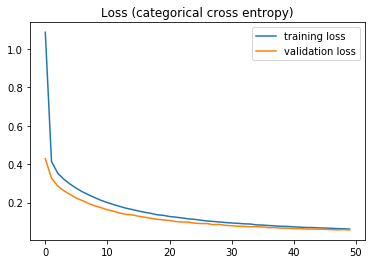

In [10]:
history = eval_hyperparam(0.01)
plot_accuracy(history)
plot_loss(history)

This is a good example of a small learning rate. On the one hand, we can see that the loss function converges, but it takes many epochs to do so. This means that we are moving excessively slowly towards the minimum. In addition, we changed the number of epochs to 50 instead of 25, which is the number of the following cases, because with 25 it did not converge. On other hand, the train and the validation errors are very similar, which shows a good generalization. We also notice that the two cases have similar errors (1.77% and 1.86%).

**Case 2**: learning rate = 0.1

Baseline Error: 1.11%


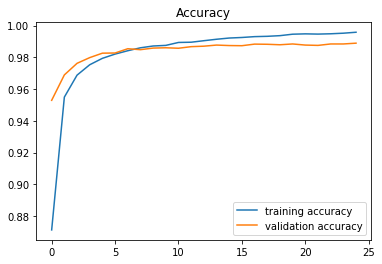

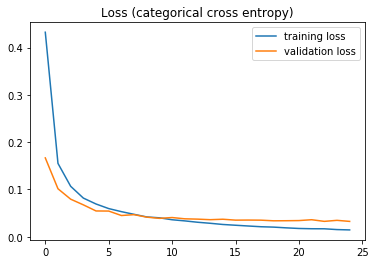

In [17]:
history = eval_hyperparam(0.1)
plot_accuracy(history)
plot_loss(history)

Baseline Error: 1.06%


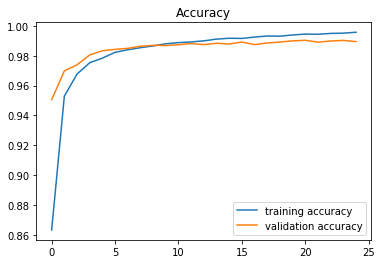

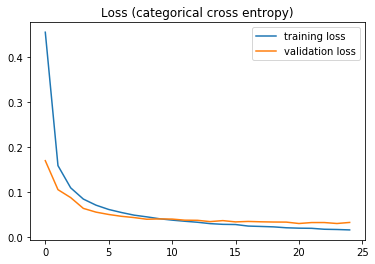

In [18]:
history = eval_hyperparam(0.1)
plot_accuracy(history)
plot_loss(history)

In contrast to the previous learning rate (0.01), this value makes the loss converge faster, as we were moving faster because this learning rate was higher, but the CNN starts to overfit around the seventh or eighth epoch in both cases, so we should have stopped there in order to prevent the lack of generalization. We can also see that the loss has decreased compared to the previous value, so this would be a better option than the other one.

**Case 3**: learning rate = 0.3

Baseline Error: 0.88%


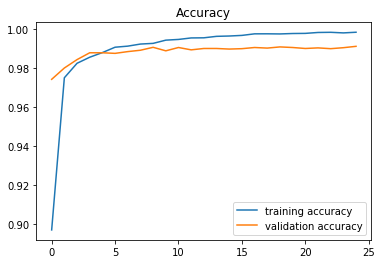

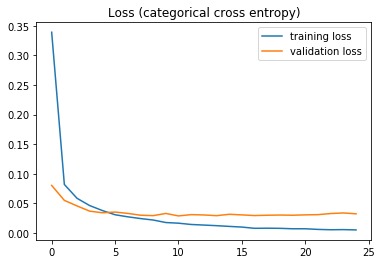

In [19]:
history = eval_hyperparam(0.3)
plot_accuracy(history)
plot_loss(history)

Baseline Error: 0.95%


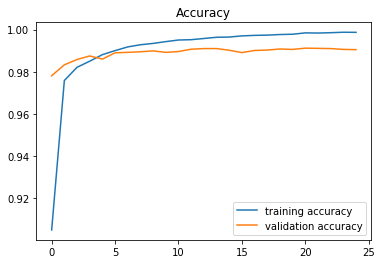

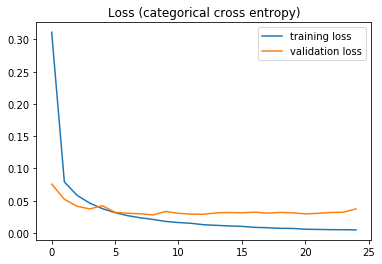

In [20]:
history = eval_hyperparam(0.3)
plot_accuracy(history)
plot_loss(history)

This is the best option until now. The loss function in both training and validation phases converges very fast. In particular, in the validation test it reaches the minimum around the fourth epoch (beyond this epoch, the model starts to overfit on the training set), so it means that we could train our model with only four epochs or so. Additionally, we have a loss of only 0.88% in the best case of the both, and 0.95% in the worst.

Therefore, with this value the training is much faster and has a better result, regarding accuracy, than the previous ones.

**Case 4**: learning rate = 0.5

Baseline Error: 0.92%


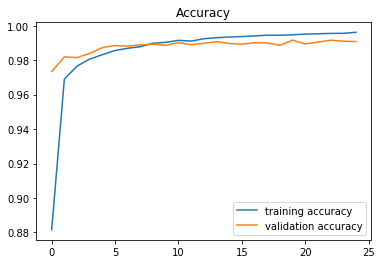

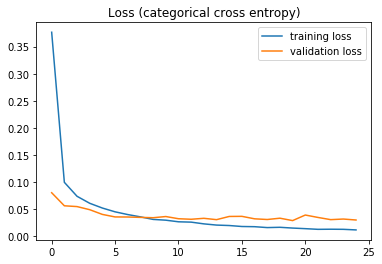

In [22]:
history = eval_hyperparam(0.5)
plot_accuracy(history)
plot_loss(history)

Baseline Error: 0.91%


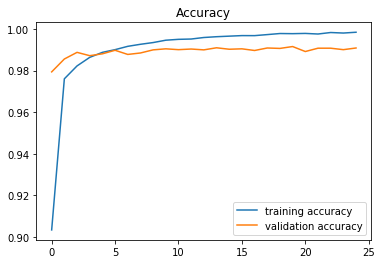

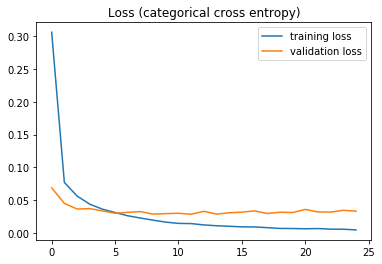

In [23]:
history = eval_hyperparam(0.5)
plot_accuracy(history)
plot_loss(history)

This case, 0.5, is similar to the 0.3 one. It converges very fast, starts to overfit passed the fourth or fifth epoch, and the losses are 0.91% and 0.92%, both of them lower than the worst loss value in the 0.3 case (0.95%), but higher than the best one (0.88%).

Considering that, within the same learning rate value, we have two different loss values depending on the training set, we cannot say with total certainty whether it is better for the learning rate to be 0.3 or 0.5. We only can assume that any value between 0.3 and 0.5 is a good option for the learning rate.

**Case 5**: learning rate = 0.7 and 1 (examples of very high values)

Baseline Error: 88.65%


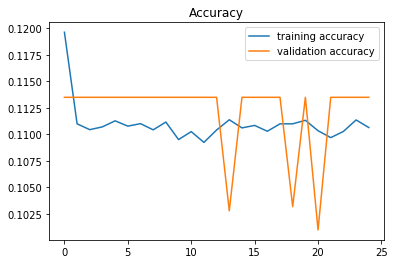

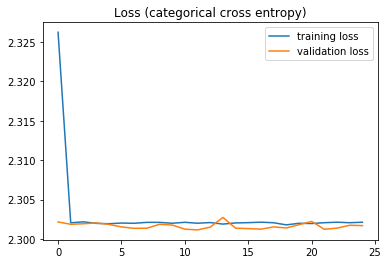

In [25]:
history = eval_hyperparam(0.7)
plot_accuracy(history)
plot_loss(history)

Baseline Error: 88.65%


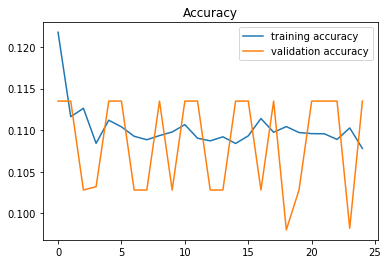

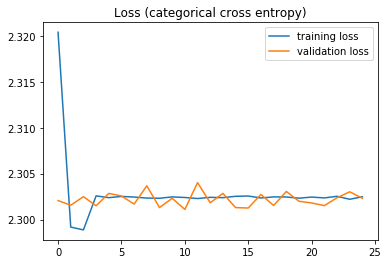

In [24]:
history = eval_hyperparam(1)
plot_accuracy(history)
plot_loss(history)

In both cases we have an error of 88.65%! It is surprising in the 0.7 case, which is very close to 0.5, one of the values that minimizes the loss. The values were so high it was rather useless for upgrading the parameters.

The peaks in both accuracy and loss graphs show us how each time we were near of the minimum in the loss function, we overshot it due to the excessive learning rate, so the loss and the accuracy never really converge, especially in the validation phase.

**Alternatives**

There are different methods that involve the learning rate for making the CNN training phase more efficient. Here are two of them:

*Cyclical Learning Rate*

This method consists in cycling the learning rate value between a lower bound and an upper bound. The higher values are useful when the function reaches a saddle point, because it is easier to come out of it than with a lower value.

*Warmup*

Warmup consists in increasing the learning rate value while training. There are two types:

   - Constant warmup: For a few epochs, you train the model with a small learning rate and then increase the learning rate by multiplying by a certain constant number.

   - Gradual warmup: You start with a small learning rate and then gradually increase it until it reaches a desired value. It is useful with large batch sizes.

Jennifer Cheung and Paula Barja, January 2018